In [1]:
import pandas as pd
import scipy

dfep = pd.read_csv("../motzer.Gene_expression_TPM.txt",index_col=0)

In [2]:
dfep.set_index("HUGO",inplace=True)

<Axes: ylabel='Density'>

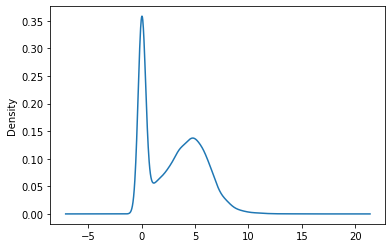

In [3]:
dfep["X00936b9285d6b8665ae9122993fb8e91"].plot.kde()

<Axes: ylabel='Density'>

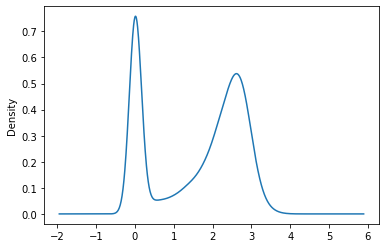

In [4]:
import numpy as np
dfep1= np.log2(dfep+1)
dfep1["X00936b9285d6b8665ae9122993fb8e91"].plot.kde()

In [5]:
dfep1

,X00936b9285d6b8665ae9122993fb8e91,X105622fadc33f23755ac2df823110aca,Xe44f39747a8e84b02b4cb24659312144,X293dd1284496215e9a0eca9f17a98e7e,X01ed7190ce00862696edbf047b542045,Xf4a6a5a1450a8448882e1c0aebc0eea5,Xf7ee4a331a8fd70edc240dff978c170d,Xcddbd4d01bc7513298a5135e97cfdb6b,Xa57451efa2822becb256706fe939d078,Xff8fbe2fe76c82d429d4fa1d315f3b93,...,Xa7d2bd80340b4019986ea8d8c3638c75,Xbc7a029dc7ce4b19a5a2b78a7b2fc6ae,X13b911b56a330efd2660b67b1cf98466,X9388bd484d0e404c6732573b4228d2a2,Xc3d410d70dd7359baa40126494fb6765,X50772aa64efb859960b20f8801cd6f58,X91bcd3067a1a7954692d836515e04869,Xc7439a06ffa32b313b0ec1b987b992a2,X21a6043653d187f8bbead475d2f49791,Xa021f5de25a2ffa059870f059a65d075
HUGO,,,,,,,,,,,,,,,,,,,,,
A1BG,1.967169,3.407353,1.906891,1.664483,1.286881,1.333424,1.636915,1.655352,1.704872,1.769772,...,0.014355,1.195348,1.910733,1.090853,0.847997,0.910733,1.220330,1.454176,1.485427,1.641546
A1BG-AS1,1.769772,0.773996,1.799087,0.757023,1.500802,0.014355,1.659925,1.207893,1.682573,1.627607,...,0.014355,0.014355,1.490570,0.545968,0.014355,0.214125,1.111031,0.641546,1.350497,1.035624
A1CF,2.513491,2.805292,1.298658,0.014355,1.744161,0.014355,0.014355,0.014355,1.339137,0.014355,...,2.553361,2.111031,1.918386,2.454176,2.615887,2.367371,0.014355,1.137504,2.049631,2.140779
A2M,3.558268,3.608809,3.606442,3.571677,3.473787,3.198494,3.671293,3.270529,3.428946,3.522307,...,3.308885,3.343408,3.452859,3.228049,3.090853,3.467279,3.454176,3.316146,3.491853,3.523562
A2M-AS1,1.594549,0.536053,1.584963,1.361768,1.735522,1.974529,1.782409,1.137504,1.516015,1.748461,...,1.526069,1.263034,1.839960,1.531069,1.891419,1.427606,1.400538,0.713696,1.427606,1.111031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.014355,1.214125,0.014355,0.516015,0.014355,2.153805,0.014355,0.070389,1.316146,0.495695,...,2.375735,1.823749,1.718088,0.014355,2.137504,2.104337,0.014355,0.275007,0.014355,0.695994
ZYG11B,2.356144,2.422233,2.408712,2.367371,2.446256,2.250962,2.472488,2.097611,2.378512,2.321928,...,2.392317,2.223423,2.321928,2.204767,2.263034,2.477677,2.339137,2.416840,2.430285,2.310340
ZYX,3.206331,3.114367,3.337711,3.272023,3.214125,3.272023,3.334854,3.340562,3.211012,3.238787,...,3.152183,3.209453,3.317594,3.331992,3.092546,3.206331,3.196922,3.158660,3.331992,3.330558


In [6]:
gene_prot = pd.read_csv("../../braun_data_log2_or_not/gencode.v43.annotation_geneOnly_mainAnnot.csv")

In [7]:
gene_prot_filtered = gene_prot[gene_prot["gene_type"].str.contains("IG_C_gene|IG_D_gene|IG_J_gene|IG_V_gene|Mt_rRNA|Mt_tRNA|\
        TEC|TR_C_gene|TR_D_gene|TR_J_gene|TR_V_gene|protein_coding|lncRNA")==True]

In [8]:
dfep1.reset_index(inplace=True)
dfep1_filtered = dfep1[dfep1["HUGO"].isin(gene_prot_filtered["gene_name"])] 

In [10]:
dfcl = pd.read_csv("../motzer2021_clinical_data.txt",sep="\t")
#pd1 = dfcl[(dfcl["TRT01P"]=="Avelumab+Axitinib")&(dfcl["PDL1FL"]=="Y")]
pd1 = dfcl[dfcl["TRT01P"]=="Avelumab+Axitinib"]

inter = set(dfep1_filtered.columns.tolist()[1:]).intersection(pd1["ID"].tolist())
dfpd1 = dfep1_filtered[["HUGO"]+list(inter)]

In [11]:
dfpd1

,HUGO,Xcdaf1a47e636b818a05fc059e5e7362e,Xed91741e1dcf7f5d6daa5266d106db68,X76ebb83ce08b46b79c0ac9188be50566,X4fa2a1b3738de2989fb9621b6895af41,X680a33183fd78f2b9a08c97342f7a9b0,X16f59d5c4921b2ba45f007dabad3cbed,X142598966b9c6f373bd9f077689c67d8,X6f4813ac3666d0bcab8c61a8ac6bec57,Xb847a6787ab5c7701c641462787e3ac0,...,X8301d6fe44fd03cc1af1d730ae7938e0,Xe49744bb3cd2750dacc5f87e48c34c34,X4fd2a06a93591162de642a421b33fa77,Xd14fb91b737e78e07ee6622e56539dcd,Xdae1b2a0bb4d7a946c6090f4b63ff3cf,X82e18c17d30609fcaef903843d59d791,X65267ab96e97ada6d44778c6bca9c9e8,X33fe25b1ae7fa2d13b0cebf465cda997,X5f6d56c13a1a7968d5c20cf44c9ed3d9,X5f49414082930ad3d6faa26afe948131
0,A1BG,1.735522,1.117695,1.263034,1.280956,1.895303,1.555816,1.847997,3.174726,1.541019,...,1.765535,1.214125,1.959770,1.739848,1.257011,1.028569,1.035624,1.599318,1.691534,1.922198
1,A1BG-AS1,1.584963,0.632268,0.765535,1.405992,1.604071,1.077243,1.664483,0.871844,1.827819,...,1.594549,0.565597,2.185867,1.000000,0.214125,0.014355,0.124328,0.815575,1.448901,1.650765
2,A1CF,1.384050,2.066950,0.748461,0.111031,2.266037,0.014355,0.014355,2.424922,0.137504,...,2.223423,0.014355,2.017922,0.014355,1.316146,0.014355,0.014355,2.260026,0.014355,1.560715
3,A2M,3.509696,3.047887,3.217231,3.488001,3.444932,3.311794,3.399171,3.240314,3.650765,...,3.427606,3.416840,3.469886,3.451541,3.411426,3.329124,3.408712,3.452859,3.246408,3.507160
4,A2M-AS1,1.709291,1.673556,1.028569,1.070389,1.298658,0.941106,1.799087,0.298658,1.641546,...,1.169925,1.077243,1.090853,1.883621,1.867896,1.769772,1.144046,1.970854,1.077243,1.526069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22950,ZYG11A,1.536053,0.014355,0.014355,0.956057,1.042644,1.748461,2.025029,2.910733,0.084064,...,0.014355,0.014355,1.718088,1.438293,0.286881,0.014355,0.422233,2.395063,0.014355,0.014355
22951,ZYG11B,2.266037,2.207893,2.367371,2.400538,2.378512,2.400538,2.358959,2.364572,2.400538,...,2.324811,2.263034,2.301588,2.344828,2.384050,2.558268,2.207893,2.459432,2.257011,2.310340
22952,ZYX,3.307429,3.148934,3.317594,3.214125,3.317594,3.231125,3.266037,3.082362,3.307429,...,3.185867,3.226509,3.176323,3.377124,3.294253,3.137504,3.169925,3.137504,3.277985,3.329124
22953,ZZEF1,2.687061,2.750607,2.655352,2.695994,2.761285,2.754888,2.763412,2.687061,2.875780,...,2.689299,2.726831,2.835924,2.669027,2.596935,2.678072,2.675816,2.746313,2.678072,2.825786


In [12]:
#dfpd1.set_index("HUGO").T.to_csv("motzer.log2.354samples.filter.txt")

In [13]:
#pd.read_csv("motzer.log2.filter.txt")
pd.read_csv("motzer.log2.354samples.filter.txt")

,Unnamed: 0,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,Xcdaf1a47e636b818a05fc059e5e7362e,1.735522,1.584963,1.384050,3.509696,1.709291,0.014355,0.201634,2.939227,0.014355,...,1.871844,2.121015,2.286881,2.229588,2.017922,1.536053,2.266037,3.307429,2.687061,2.675816
1,Xed91741e1dcf7f5d6daa5266d106db68,1.117695,0.632268,2.066950,3.047887,1.673556,0.014355,1.226509,2.498251,0.014355,...,1.851999,2.176323,2.389567,2.121015,2.341986,0.014355,2.207893,3.148934,2.750607,2.533563
2,X76ebb83ce08b46b79c0ac9188be50566,1.263034,0.765535,0.748461,3.217231,1.028569,0.014355,0.176323,2.641546,0.014355,...,2.295723,2.283922,2.140779,2.070389,1.778209,0.014355,2.367371,3.317594,2.655352,2.829850
3,X4fa2a1b3738de2989fb9621b6895af41,1.280956,1.405992,0.111031,3.488001,1.070389,0.014355,1.650765,2.839960,0.014355,...,1.794936,1.851999,2.198494,2.226509,2.107688,0.956057,2.400538,3.214125,2.695994,2.682573
4,X680a33183fd78f2b9a08c97342f7a9b0,1.895303,1.604071,2.266037,3.444932,1.298658,0.014355,2.060047,2.998196,0.014355,...,1.855990,2.358959,2.272023,2.310340,2.147307,1.042644,2.378512,3.317594,2.761285,2.750607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,X82e18c17d30609fcaef903843d59d791,1.028569,0.014355,0.014355,3.329124,1.769772,0.014355,0.704872,2.560715,0.014355,...,1.929791,1.220330,2.073820,2.090853,1.925999,0.014355,2.558268,3.137504,2.678072,2.771886
350,X65267ab96e97ada6d44778c6bca9c9e8,1.035624,0.124328,0.014355,3.408712,1.144046,0.014355,0.432959,2.863938,0.014355,...,1.899176,1.823749,2.367371,2.182692,2.367371,0.422233,2.207893,3.169925,2.675816,2.693766
351,X33fe25b1ae7fa2d13b0cebf465cda997,1.599318,0.815575,2.260026,3.452859,1.970854,0.014355,0.014355,2.985500,0.014355,...,1.863938,2.007196,2.316146,2.244887,2.153805,2.395063,2.459432,3.137504,2.746313,2.790772
352,X5f6d56c13a1a7968d5c20cf44c9ed3d9,1.691534,1.448901,0.014355,3.246408,1.077243,0.014355,1.321928,2.761285,0.014355,...,2.253989,2.523562,2.003602,2.053111,1.855990,0.014355,2.257011,3.277985,2.678072,2.853996
